In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
# Checking for null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Filling null values of bmi column with mean value
data['bmi'].fillna(data['bmi'].mean(),inplace = True)
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Dropping non usable data

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


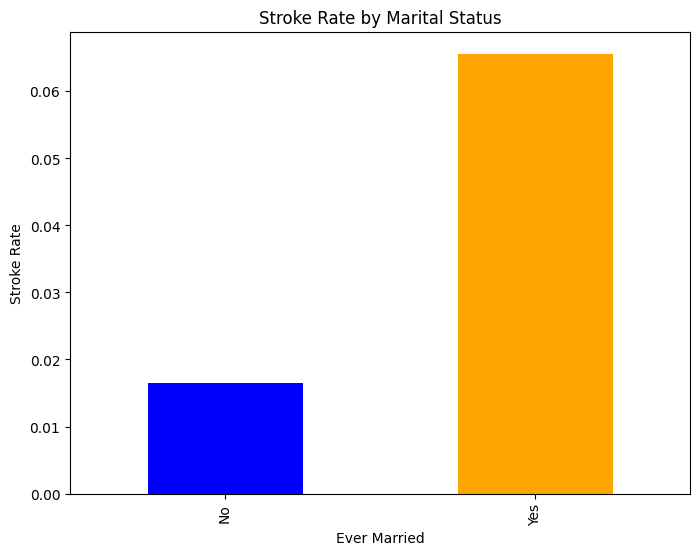

In [ ]:
# Graphing the 'ever_married' column with the Stroke rate to see if it affects the data
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
grouped = data.groupby("ever_married")["stroke"].mean()

grouped.plot(kind="bar", color=["blue", "orange"])

plt.xlabel("Ever Married")
plt.ylabel("Stroke Rate")
plt.title("Stroke Rate by Marital Status")

plt.show()


In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
unknown_count = (data['smoking_status'] == 'Unknown').sum()
print(unknown_count)
temp1 = (data['smoking_status']=='smokes').sum()
temp2 = (data['smoking_status']=='never smoked').sum()
temp3 =(data['smoking_status']=='formerly smoked').sum()
print(temp1)
print(temp2)
print(temp3)

1544
789
1892
885


In [ ]:
(data['work_type']=='Never_worked').sum()

22

In [ ]:
# encoding the data****
data = data[data['gender'] != 'Other']
data['ever_married'] = data['ever_married'].replace({'Yes': 1, 'No': 0})
data["gender"] = data["gender"].replace({'Male' : 1,'Female' : 0})
data["work_type"] = data["work_type"].replace({'children' : 0, 'Private' : 1,'Govt_job' : 1,'Self-employed': 2,'Never_worked':3})
data["smoking_status"] = data["smoking_status"].replace({'Unknown' : 0,'never smoked' : 0,'formerly smoked' : 1,'smokes' : 2})

data.head(10)

<ipython-input-16-a23fd4049d74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ever_married'] = data['ever_married'].replace({'Yes': 1, 'No': 0})
<ipython-input-16-a23fd4049d74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gender"] = data["gender"].replace({'Male' : 1,'Female' : 0})
<ipython-input-16-a23fd4049d74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,Urban,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,2,Rural,202.21,28.893237,0,1
2,31112,1,80.0,0,1,1,1,Rural,105.92,32.500000,0,1
3,60182,0,49.0,0,0,1,1,Urban,171.23,34.400000,2,1
4,1665,0,79.0,1,0,1,2,Rural,174.12,24.000000,0,1
5,56669,1,81.0,0,0,1,1,Urban,186.21,29.000000,1,1
6,53882,1,74.0,1,1,1,1,Rural,70.09,27.400000,0,1
7,10434,0,69.0,0,0,0,1,Urban,94.39,22.800000,0,1
8,27419,0,59.0,0,0,1,1,Rural,76.15,28.893237,0,1
9,60491,0,78.0,0,0,1,1,Urban,58.57,24.200000,0,1


In [ ]:
data.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

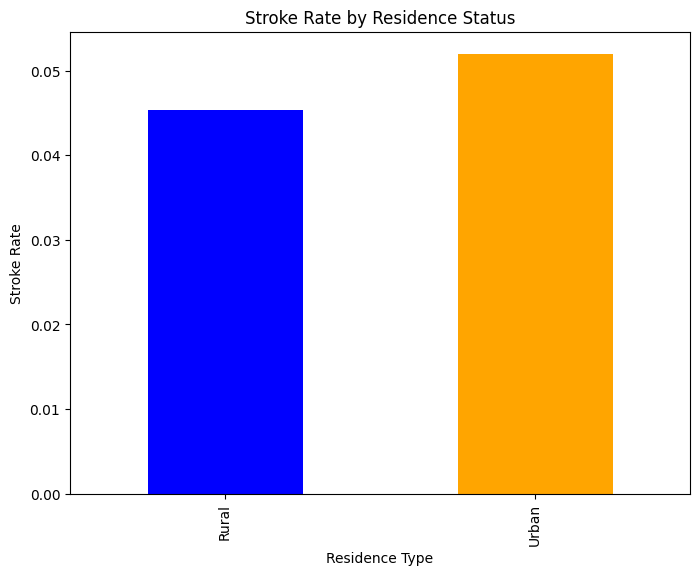

In [ ]:
# visualizing the Residence Status column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
grouped = data.groupby("Residence_type")["stroke"].mean()

grouped.plot(kind="bar", color=["blue", "orange"])

plt.xlabel("Residence Type")
plt.ylabel("Stroke Rate")
plt.title("Stroke Rate by Residence Status")

plt.show()

In [ ]:
data = data.drop(columns = "Residence_type")
data = data.drop(columns = 'id')

In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,2,202.21,28.893237,0,1
2,1,80.0,0,1,1,1,105.92,32.500000,0,1
3,0,49.0,0,0,1,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,2,174.12,24.000000,0,1
5,1,81.0,0,0,1,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,1,70.09,27.400000,0,1
7,0,69.0,0,0,0,1,94.39,22.800000,0,1
8,0,59.0,0,0,1,1,76.15,28.893237,0,1
9,0,78.0,0,0,1,1,58.57,24.200000,0,1


In [ ]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.413975,43.229986,0.097475,0.054022,0.656293,1.034449,106.140399,28.894508,0.481895,0.048738
std,0.492592,22.613575,0.296633,0.226084,0.474991,0.557559,45.285004,7.698235,0.747428,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,77.240000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.880000,28.400000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,271.740000,97.600000,2.000000,1.000000


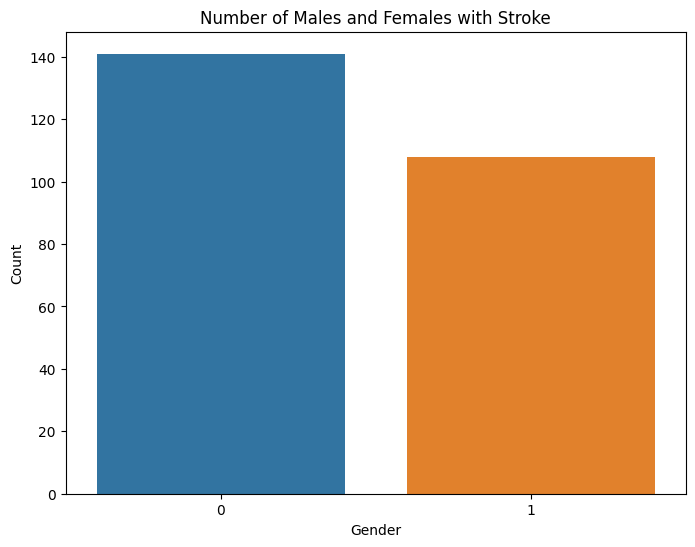

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'stroke' is 1 (indicating stroke)
stroke_df = data[data['stroke'] == 1]
# Create a count plot to show the number of males and females with stroke

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=stroke_df)
plt.title('Number of Males and Females with Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


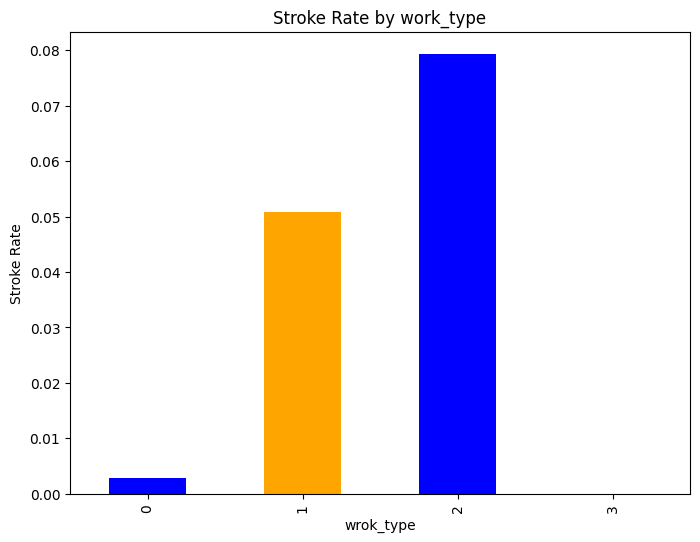

In [ ]:
#To see if work_type affect the prediction or not

plt.figure(figsize=(8, 6))
grouped = data.groupby("work_type")["stroke"].mean()

grouped.plot(kind="bar", color=["blue", "orange"])

plt.xlabel("wrok_type")
plt.ylabel("Stroke Rate")
plt.title("Stroke Rate by work_type")

plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                5109 non-null   float64
 8   smoking_status     5109 non-null   int64  
 9   stroke             5109 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 439.1 KB


In [ ]:
scaled_data = data.drop('stroke',axis = 1)
scaled_data = data.drop('gender',axis = 1)
y = data['stroke']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)
# np.savetxt('scaled_data.csv',scaled_data, delimiter=',')
# new_data = pd.read_csv('scaled_data.csv')
# new_data.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.25, random_state = 41)

In [ ]:
#applying logistic regresssion on the scaled data
from sklearn.metrics import accuracy_score
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1209
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.95      0.92      1278



In [ ]:
#applying KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

knn_y_preds=knn_model.predict(X_test)

print(f"Testing score = {accuracy_score(y_test,y_pred)}")




Testing score = 1.0
